## **EDA :** Initiation with Iris Classification

#### _Iris Dataset_

🟠 `on work`

---

* **Objectifs**
    * Découvrir l'analyse exploratoire de données
    * Prendre en main `NumPy`, `Pandas`, `Matplotlib`, `Seaborn`

1. **Identification générale**
    * Structure
    * Valeurs cibles
    * Types de valeurs
    * Valeurs manquantes ou défectueuses
    * Préparation
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Liens correlation
4. **Finalisation**
    * Conclusion
    * Traitements

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

**Notebook setup**

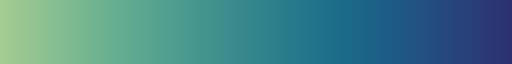

In [2]:
# Colour codes
mean_c = 'white'
median_c = '#c2e800'
default_c = '#009999'
iris_c = [
    '#3333cc', # 0 : setosa
    '#9900ff', # 1 : virsicolor
    '#e600ac' # 2 : virginica
    ]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, ...
sns.color_palette("crest", as_cmap=True)

**Iris dataset**

(_no-url_)

In [3]:
iris_file_path = '../_datasets/iris_data.csv'
iris_data = pd.read_csv(iris_file_path)

iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


---
### **1.** Identification générale

##### **1.1** - Structure

In [4]:
# (!) - 150 entries dispatched in 5 columns
iris_data.shape

(150, 5)

In [5]:
# (!) - No 'object' (text), only numeric values, 150 non-null for each columns.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


##### **1.2** - Valeurs cibles

In [6]:
# (!) - (well named) 'target' as categorical : 0 = Setosa / 1 = Virsicolor / 2 = Virginica
iris_data['target'].unique()

array([0, 1, 2], dtype=int64)

##### **1.3** - Types de valeurs

In [7]:
# (!) - Only floating-point-numbers and integers
# iris_data.dtypes.value_counts()
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [8]:
# (!) - Max values are all below 10.0
iris_data.select_dtypes(np.float64).max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

##### **1.4** - Valeurs manquantes ou défectueuses

In [9]:
# (!) - No null (as seen previously with .info())
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

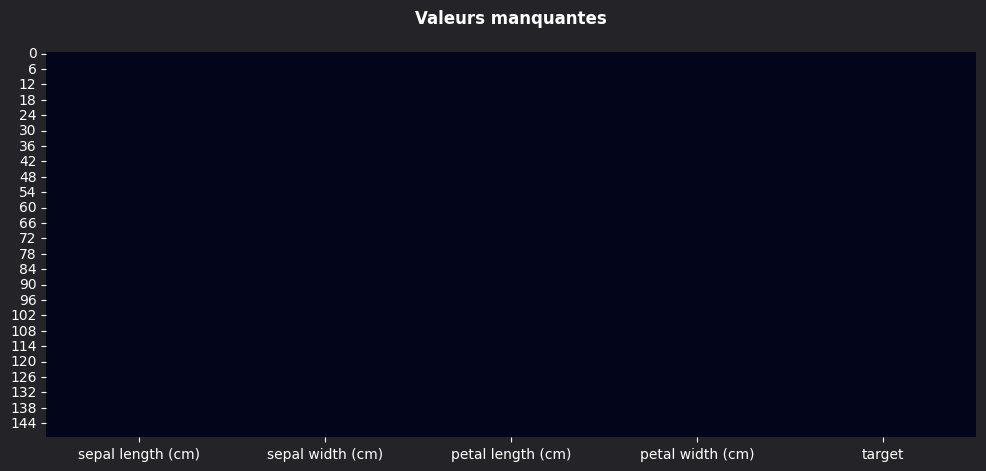

In [10]:
# (!) - ... so nothing to see :)
plt.figure(figsize=(12, 5))
plt.title("Valeurs manquantes\n")
sns.heatmap(iris_data.isnull(), cbar=False)
plt.show()

##### **1.5** - Préparation

* faciliter la manipulation et la **visualisation**
* explorer les possibilités `NumPy` et `Pandas`

In [11]:
# Rename cols
columns = {
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}

# Rename categories
iris_ctg = {
    0: 'setosa',
    1: 'virsicolor',
    2: 'virginica'
}

# Apply
iris_data = iris_data.rename(columns=columns)
iris_data['target'] = iris_data['target'].map(iris_ctg)

iris_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [12]:
# (!) - Convert type to smaller memory size : from 6128 B to 3728 B
display(iris_data.memory_usage())
memory_before = iris_data.memory_usage().sum()

iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].astype('float32')

memory_after = iris_data.memory_usage().sum()

display(f'From {memory_before} B to {memory_after}')

Index            132
sepal_length    1200
sepal_width     1200
petal_length    1200
petal_width     1200
target          1200
dtype: int64

'From 6132 B to 3732'

In [13]:
# (!) - Extract feature names for continous variables
features = iris_data.select_dtypes(np.float32).columns.to_list()

features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

---
### **2.** Analyse univariée

##### **2.1** - Cible

C:\Users\e.bayet\AppData\Local\Temp\ipykernel_17884\419130107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=iris_data, x="target", palette=iris_c)


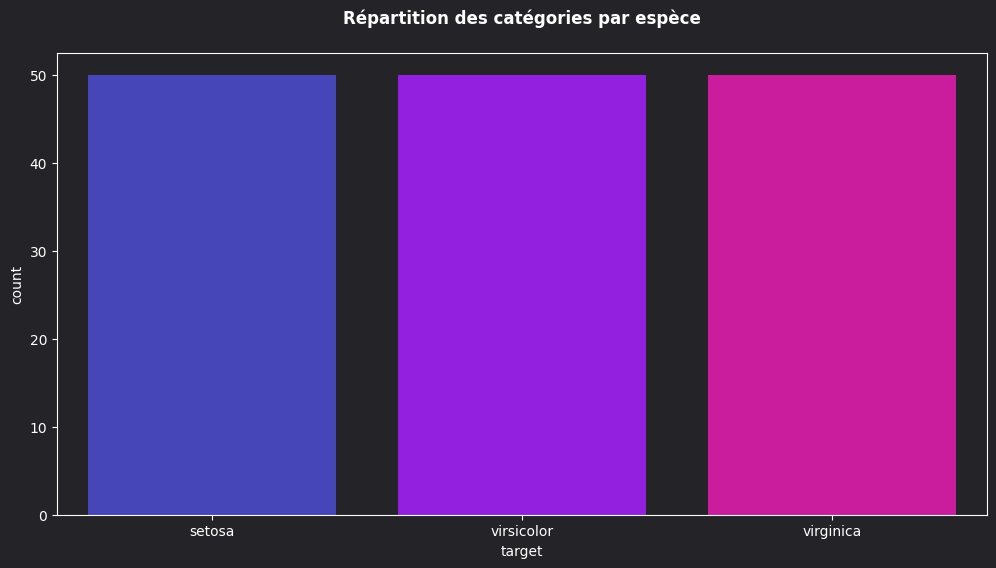

target
setosa        50
virginica     50
virsicolor    50
Name: count, dtype: int64

In [27]:
# (!) - Balanced dataset, 50 each
plt.figure(figsize=(12,6))
plt.title("Répartition des catégories par espèce\n")
sns.countplot(data=iris_data, x="target", palette=iris_c) # 
plt.show()

iris_data.value_counts('target')

##### **2.2** - Variables quantitatives continues

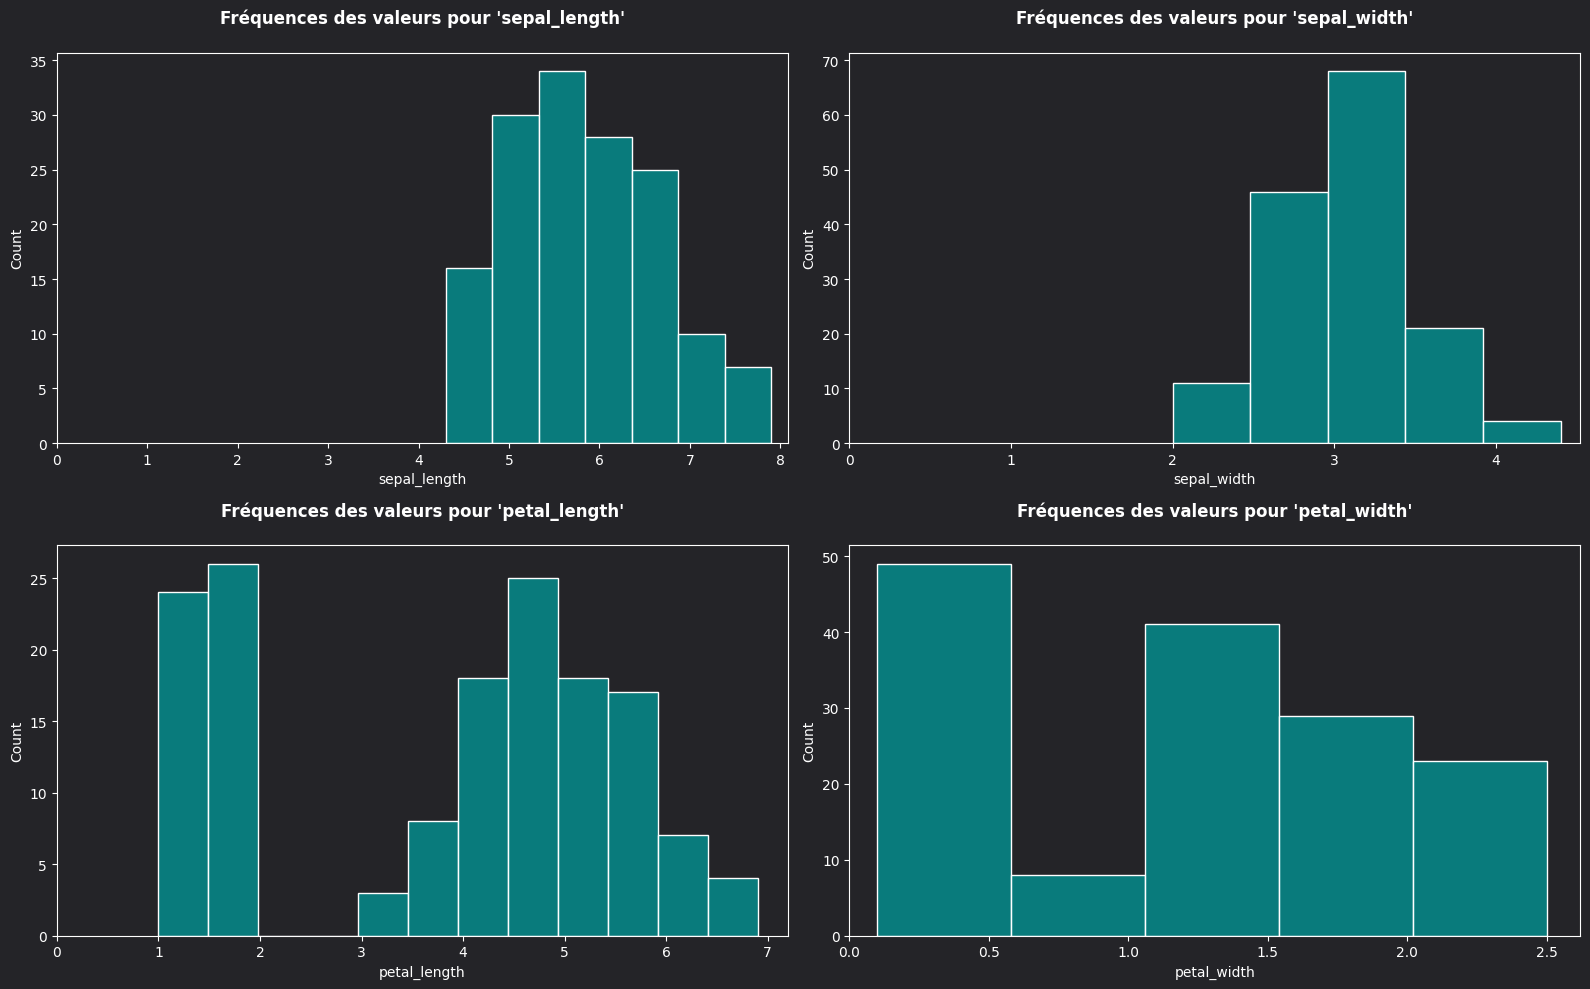

In [15]:
# (!) - Bimodal on petals, almost normal for sepals
plt.figure(figsize=(16, 10), layout="tight")
for i, col in enumerate(features) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences des valeurs pour '{col}'\n")
    sns.histplot(data=iris_data, x=col, binwidth=.5, fill=True, color=default_c)
    plt.xlim(0)
plt.show()

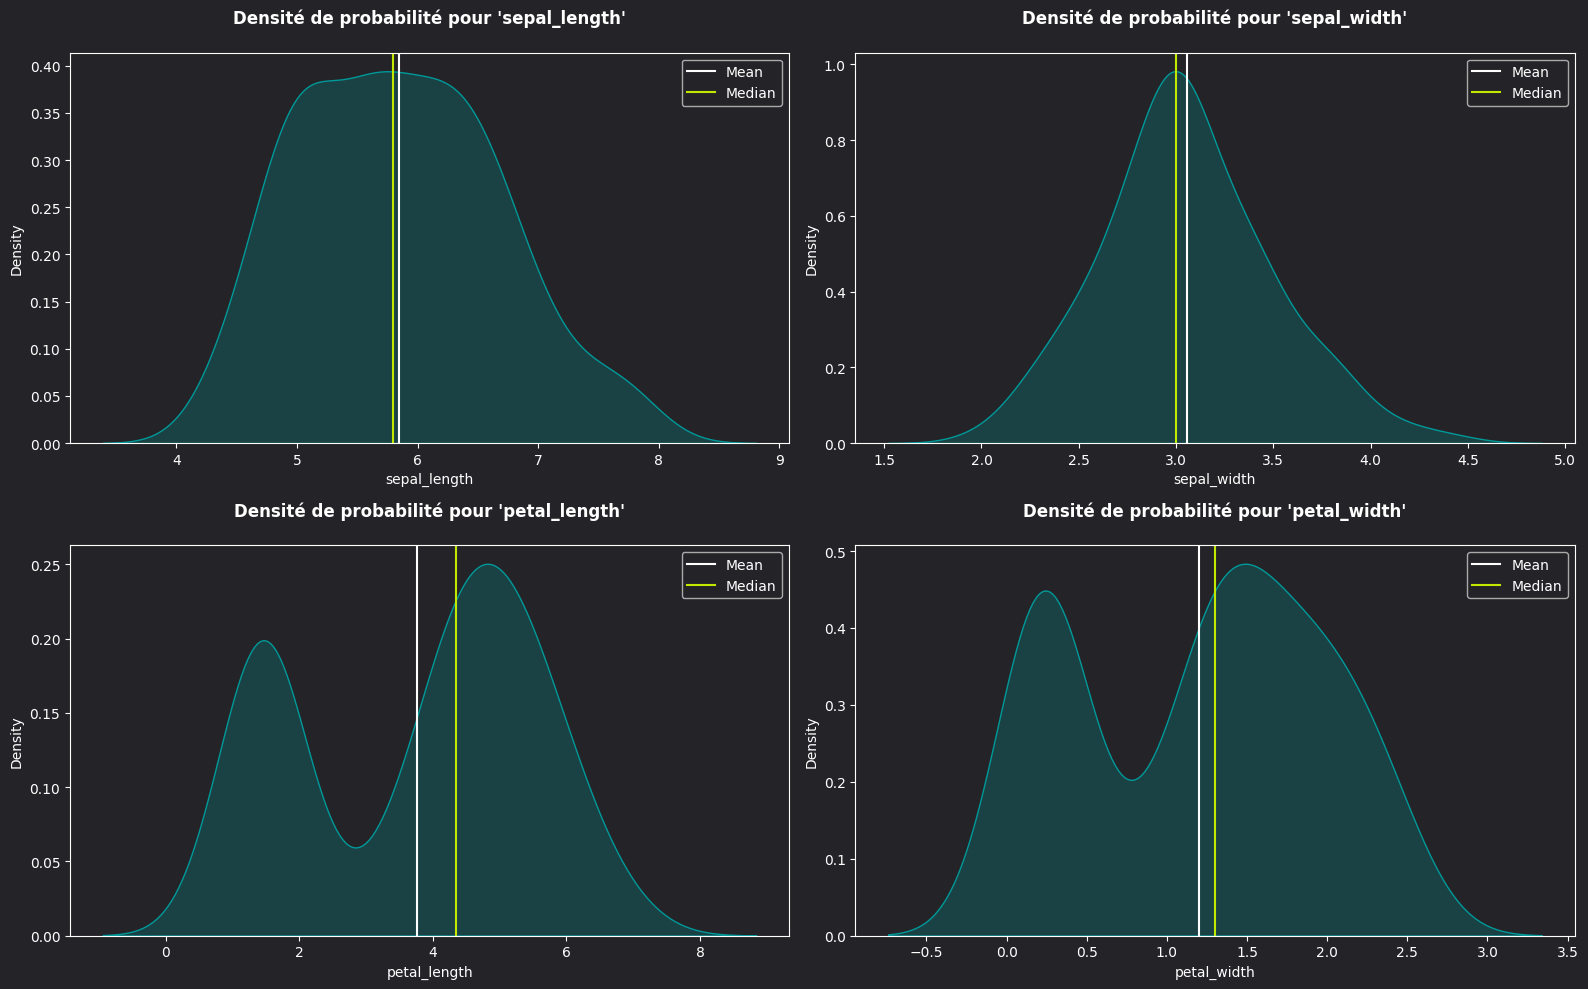

,sepal_length,sepal_width,petal_length,petal_width
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# (!) - Accurate density on sepals
plt.figure(figsize=(16, 10), layout="tight")
for i, col in enumerate(features) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Densité de probabilité pour '{col}'\n")
    sns.kdeplot(data=iris_data, x=col, fill=True, color=default_c)
    plt.axvline(iris_data[col].mean(), c=mean_c, label="Mean")
    plt.axvline(iris_data[col].median(), c=median_c, label="Median")
    plt.legend()
plt.show()

iris_data[features].describe().iloc[[2, 3, 7]]

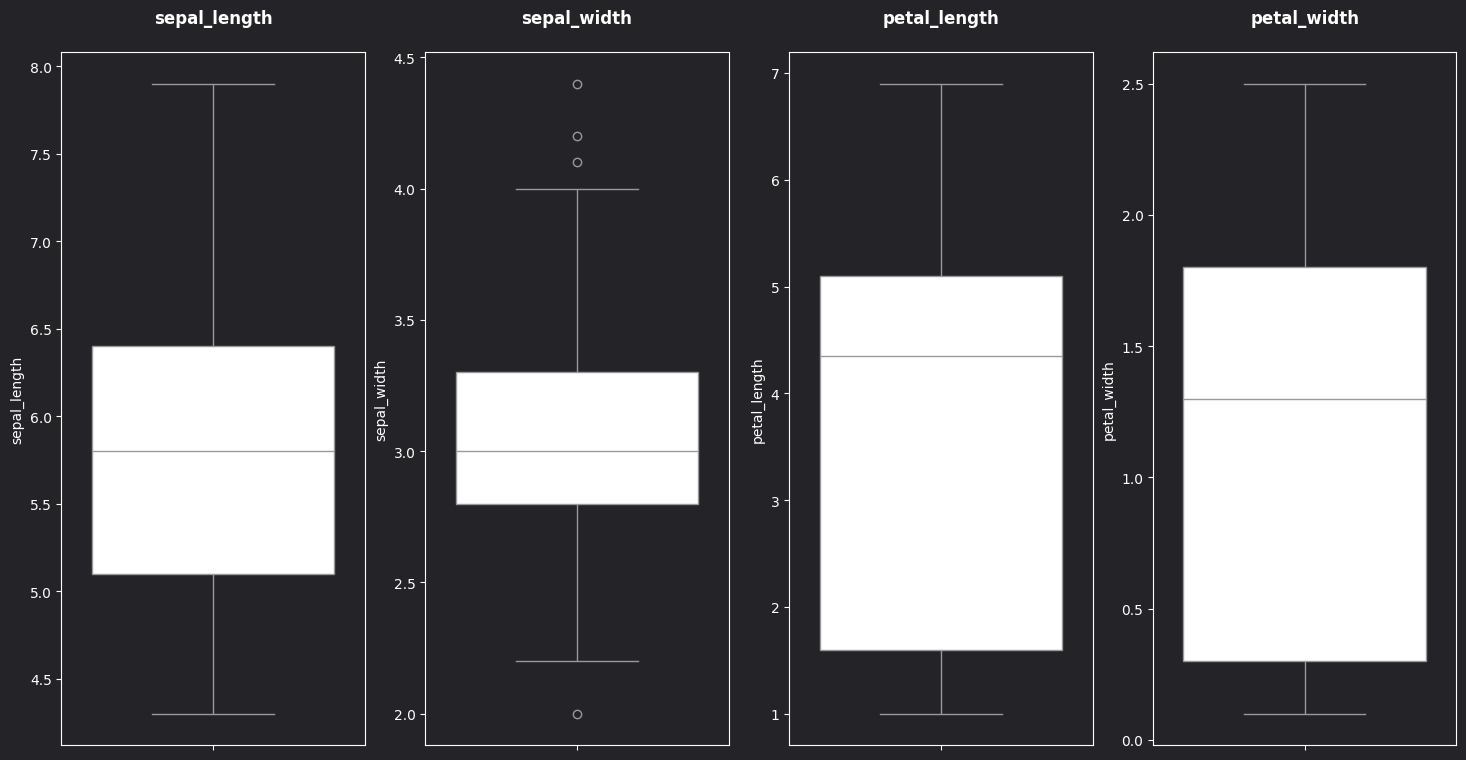

In [17]:
# (!) - Some outliers in 'sepal_width'
plt.figure(figsize=(18, 9))
for i, col in enumerate(features) :
    plt.subplot(1, 4, i+1)
    plt.title(f"{col}\n")
    sns.boxplot(data=iris_data, y=col, color="#FFFFFF")
plt.show()

In [18]:
# (!) - Values with outlied 'sepal_width' : uppers when `setosa`, and one lower when `virsicolor`
sepal_w_q25 = iris_data['sepal_width'].quantile(.25)
sepal_w_q75 = iris_data['sepal_width'].quantile(.75)
sepal_w_iqr = sepal_w_q75 - sepal_w_q25
lower_bound = sepal_w_q25 - (1.5 * sepal_w_iqr)
upper_bound = sepal_w_q75 + (1.5 * sepal_w_iqr)

print(f"Valeurs pour 'sepal_width' inférieur à {lower_bound:.3f} ou supérieur à {upper_bound:.3f}")

iris_data.loc[(iris_data['sepal_width'] < lower_bound) | (iris_data['sepal_width'] > upper_bound)].sort_values('sepal_width')

Valeurs pour 'sepal_width' inférieur à 2.050 ou supérieur à 4.050


,sepal_length,sepal_width,petal_length,petal_width,target
60,5.0,2.0,3.5,1.0,virsicolor
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


---
### **3.** Analyse bivariée

##### **3.1** - Variables quantitatives continues

Fréquence et densité par cible

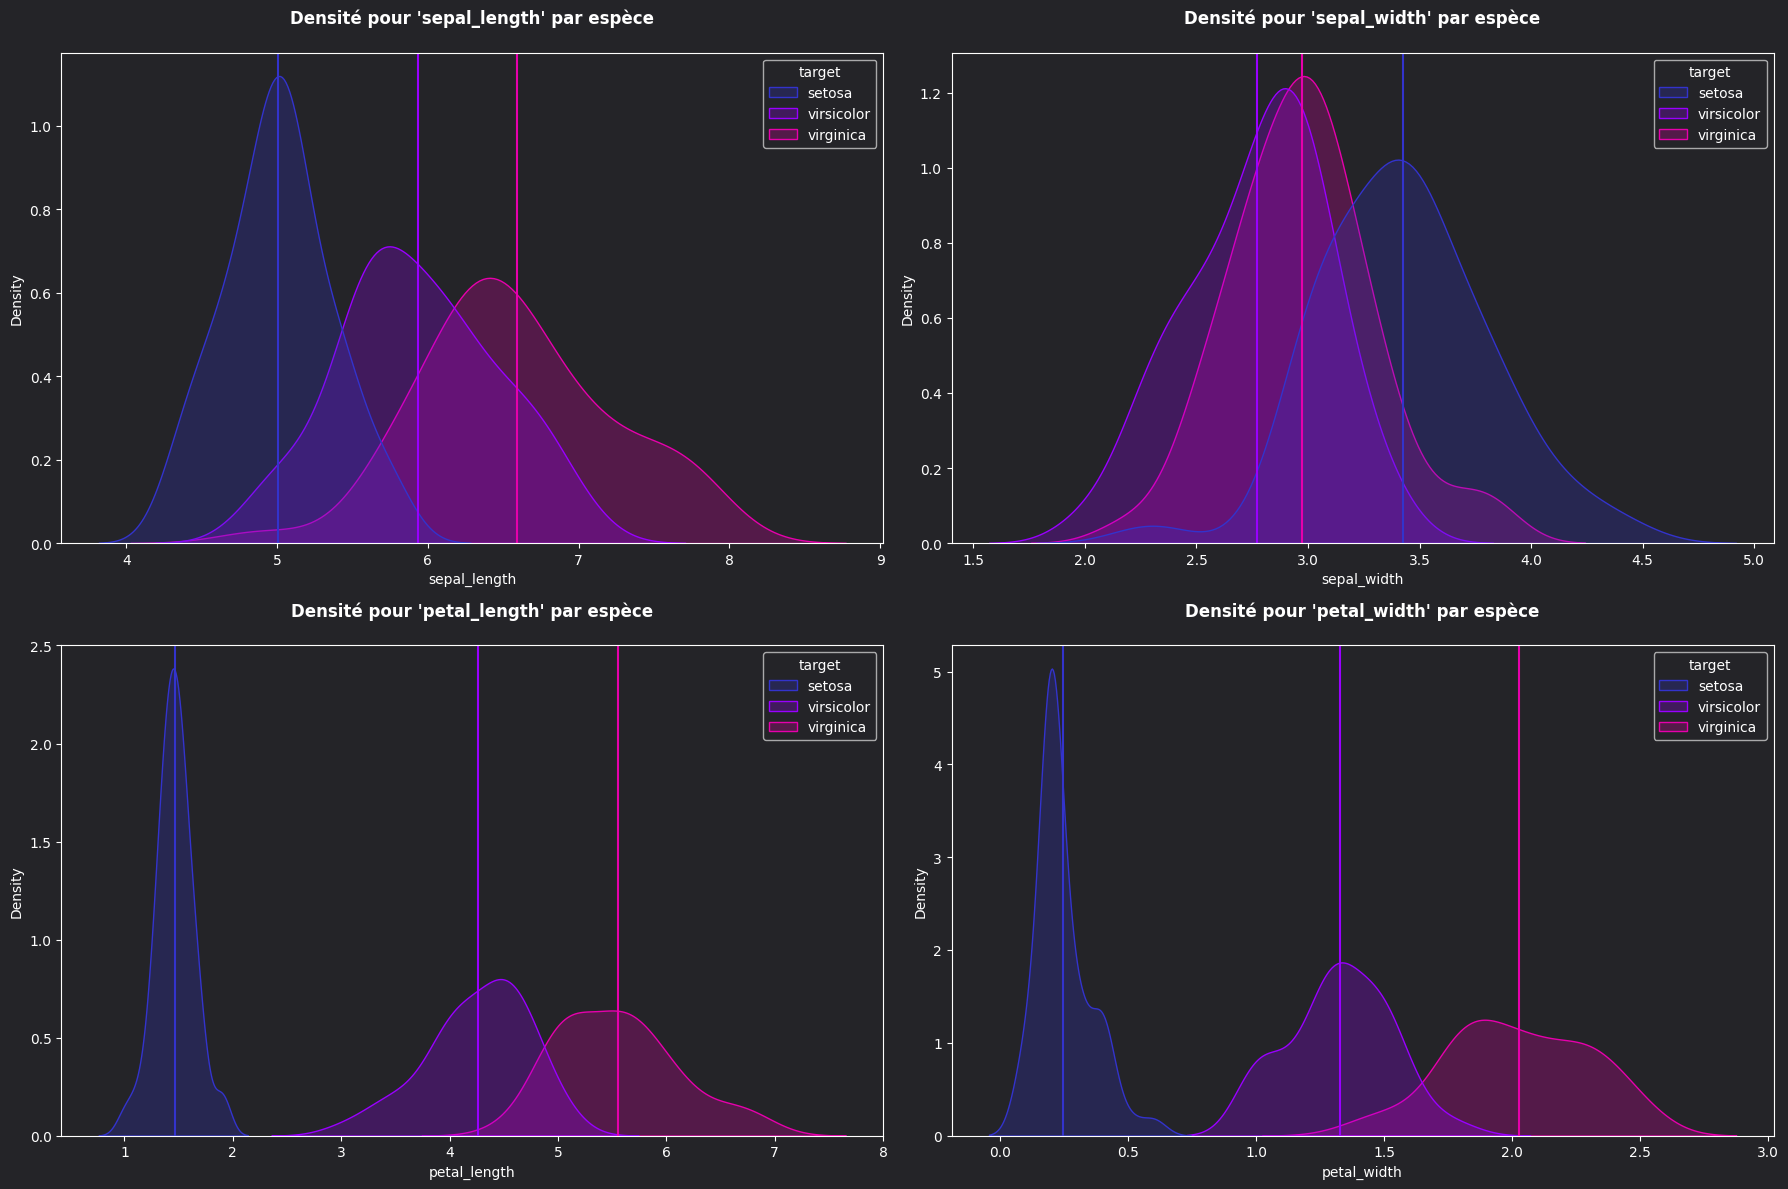

In [19]:
# (!) - `virsicolor` and `virginica` often overlapping
# (!) - `setosa` very distinct from `virsicolor` and `virginica` on petal sizes 
plt.figure(figsize=(18, 12), layout="tight")
for i, col in enumerate(features) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Densité pour '{col}' par espèce\n")

    sns.kdeplot(data=iris_data, x=col, hue='target', common_norm=False, fill=True, palette=iris_c)

    for j in iris_ctg : 
        plt.axvline(iris_data.loc[iris_data['target'] == iris_ctg[j], col].mean(), c=iris_c[j])

plt.show()

Valeurs aberrantes

C:\Users\e.bayet\AppData\Local\Temp\ipykernel_17884\499513150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_data, x=col, y="target", palette=iris_c)
C:\Users\e.bayet\AppData\Local\Temp\ipykernel_17884\499513150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_data, x=col, y="target", palette=iris_c)
C:\Users\e.bayet\AppData\Local\Temp\ipykernel_17884\499513150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_data, x=col, y="target", palette=iris_c)
C:\Users\e.bayet\AppData\Local\Temp\ipykernel_17884\

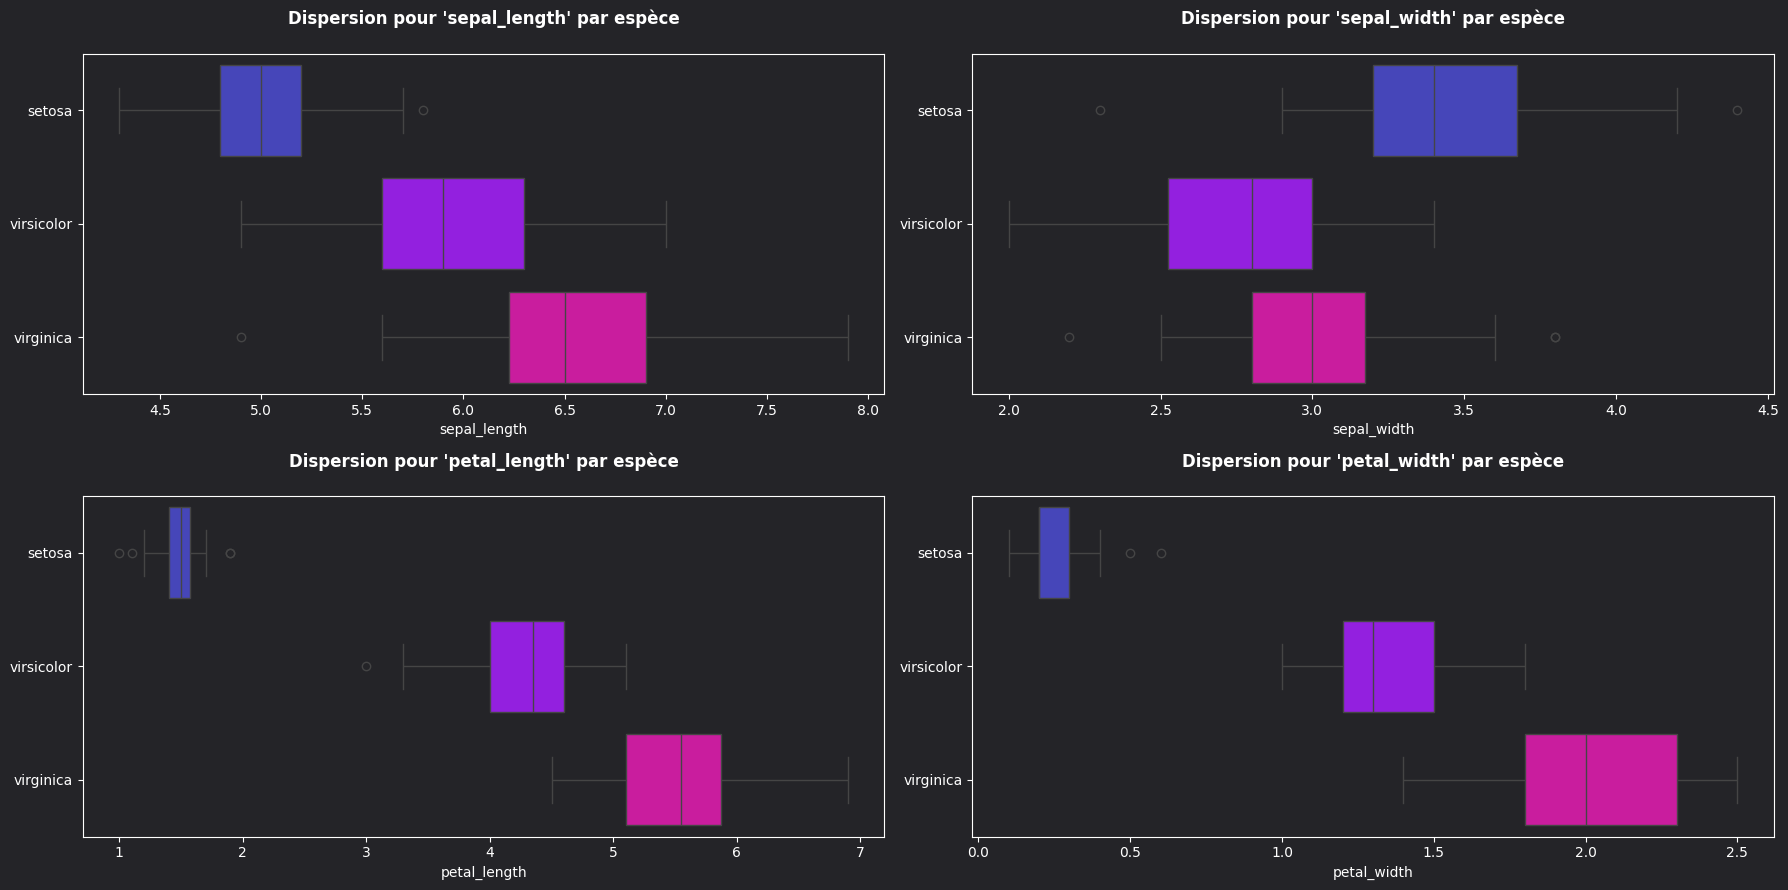

In [20]:
# (!) - `setosa` has more outliers but due to high density 
plt.figure(figsize=(18, 9), layout="tight")
for i, col in enumerate(features) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Dispersion pour '{col}' par espèce\n")
    sns.boxplot(data=iris_data, x=col, y="target", palette=iris_c)
    plt.ylabel('')
plt.show()

In [21]:
# (!) - Stats sum-up by target
display(iris_data[features[:2]+['target']].groupby('target').describe())
iris_data[features[2:]+['target']].groupby('target').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
target                                                                
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   
virsicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   

           sepal_width                                                
                 count   mean       std  min    25%  50%    75%  max  
target                                                                
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4  
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8  
virsicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4

petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
target                                                                 
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   
virsicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   

           petal_width                                            
                 count   mean       std  min  25%  50%  75%  max  
target                                                            
setosa            50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  
virsicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8

Dispersions

<Figure size 2400x2400 with 0 Axes>

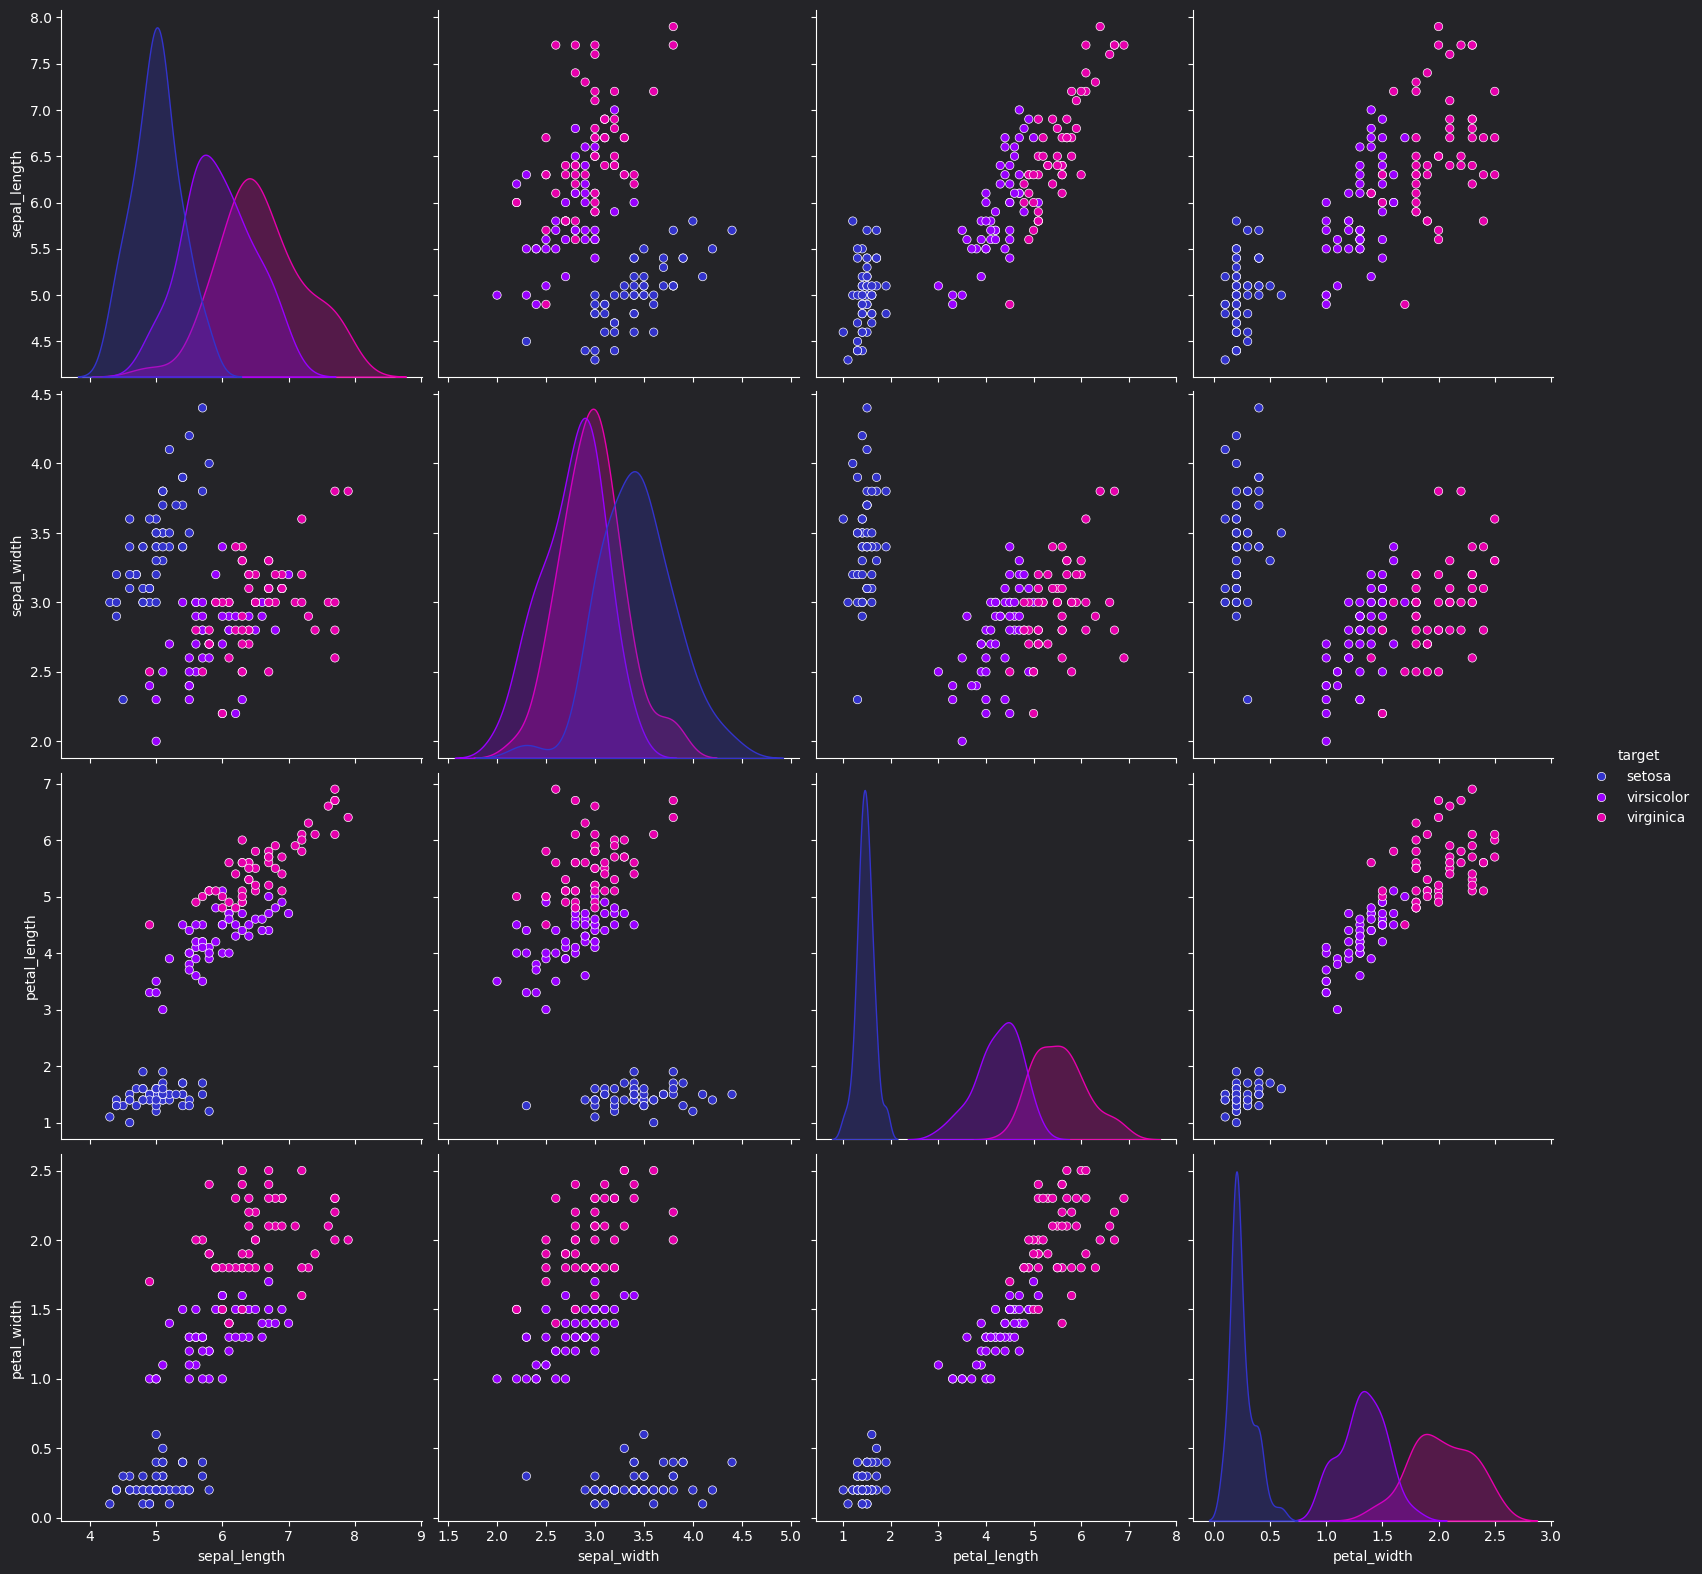

In [22]:
# (!) - Clear separation between `setosa` and others
# (!) - Almost linear dispersion for all
plt.figure(figsize=(24, 24))
sns.pairplot(data=iris_data, hue="target", height=4, palette=iris_c)
plt.show()

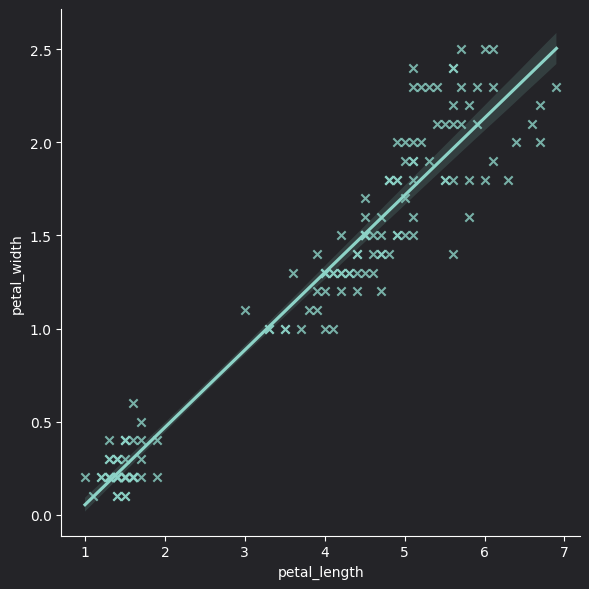

In [23]:
# (!) - Petal sizes are very linear
sns.lmplot(data=iris_data, x="petal_length", y="petal_width", height=6, markers=['x'])

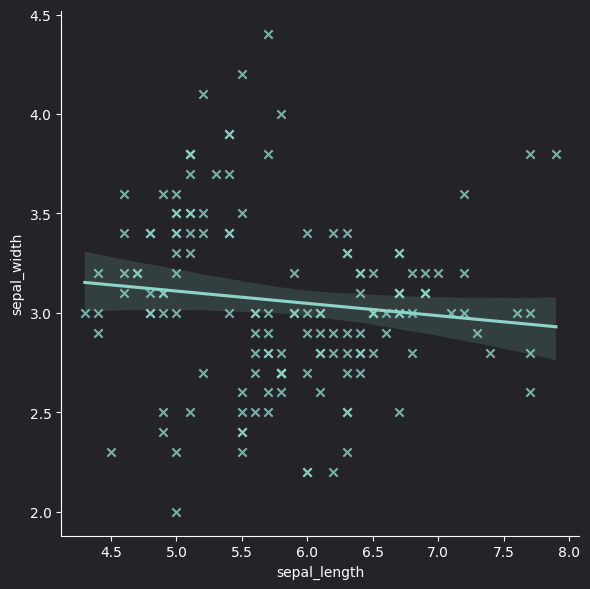

In [24]:
# (!) - Sepal sizes are more subjet to classification errors
sns.lmplot(data=iris_data, x="sepal_length", y="sepal_width", height=6, markers=['x'])

##### **3.2** - Statistiques

Liens de corrélations

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


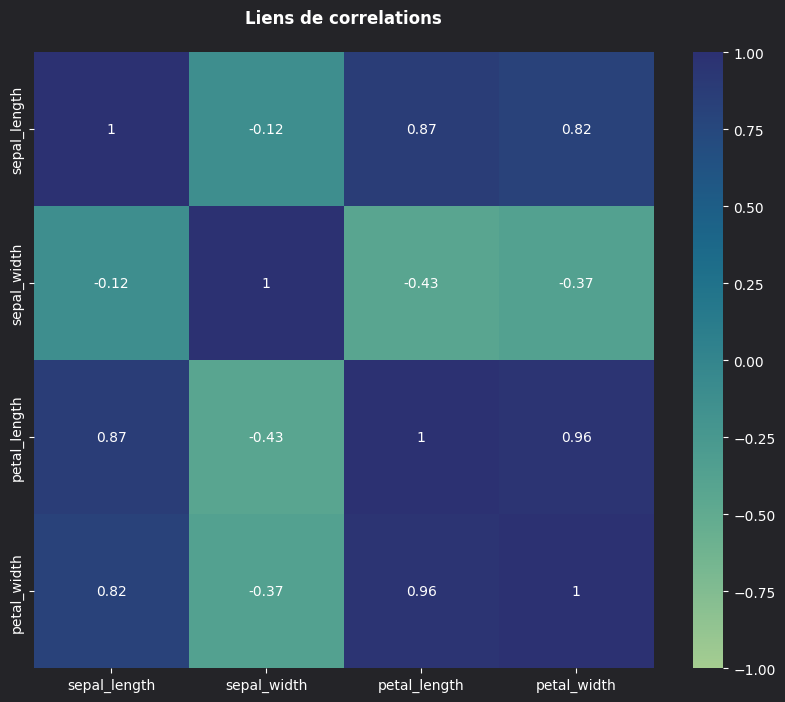

In [30]:
# (!) - Very good correlation links exept between 'sepal_width' and 'sepal_length'
plt.figure(figsize=(10, 8))
plt.title("Liens de correlations\n")
sns.heatmap(iris_data[features].corr(method='pearson'), vmin=-1, vmax=1, cmap="crest", annot=True)
plt.show()

In [32]:
# (!) - Results with 'spearman' (for demo)
iris_data[features].corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


---

### **4.** Finalisation

##### **4.1** - Conclusion

##### **4.2** - Traitement

Exportation `csv`

In [ ]:
iris_data.to_csv('../../04.machine-learning/_datasets/iris_data_prepared.csv', index=False)